<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

To investigate what causes patients to miss their appointments, we would like to find any trends in the data of patients who did not show up to their appointments. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
df = pd.read_csv('no_show_data.csv')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

Data cleaning operations to be performed include:
- Checking data frame for missing data
- Checking data frame for duplicates
- Checking data for appropriate typing, and converting data if it is not the right type
- Will also check columns to ensure that the values are appropriate

In [4]:
# Check for missing data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
# Check for duplicates; drop any duplicates if they exist
df.duplicated().sum()

0

In [6]:
# Now that we've dropped any duplicates above, we can drop any columns that may not be useful in our analysis.
# In particular, there is no reason to believe that PatientId or AppointmentID will be of use in our analysis, so we can drop
#     these columns.

df.drop(columns=['PatientId','AppointmentID'], inplace=True)

In [7]:
# Rename columns for clarity, spelling and format consistency
df.rename(columns={"ScheduledDayTime" : "ScheduledTime", "Neighbourhood" : "Neighborhood", "Handcap" : "Handicap", "Hipertension" : "Hypertension", "SMS_received" : "SMSReceived", "No-show" : "NoShow"}, inplace=True)

In [8]:
# Use Pandas' describe() function to view basic data statistics
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
df.drop(df.query('Age < 0').index, inplace=True)

In [10]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
# Previously, we observed a "Z" and "T" in the date and time for scheduled day. Let's see how many of our dataframe's
# "ScheduledDay" entries contain a "Z" in it out of the total entries in the column
(df.ScheduledDay.str.contains("Z")==True).sum(), df.ScheduledDay.count()

(110526, 110526)

In [12]:
# Previously, we observed a "Z" and "T" in the date and time for scheduled day. Let's see how many of our dataframe's
# "ScheduledDay" entries contain a "T" in it out of the total entries in the column
(df.ScheduledDay.str.contains("T")==True).sum(), df.ScheduledDay.count()

(110526, 110526)

In [13]:
# Previously, we observed a "Z" and "T" in the date and time for appointment day. Let's see how many of our dataframe's
# "AppointmentDay" entries contain a "Z" in it out of the total entries in the column
(df.AppointmentDay.str.contains("Z")==True).sum(), df.AppointmentDay.count()

(110526, 110526)

In [14]:
# Previously, we observed a "Z" and "T" in the date and time for appointment day. Let's see how many of our dataframe's
# "AppointmentDay" entries contain a "T" in it out of the total entries in the column
(df.AppointmentDay.str.contains("T")==True).sum(), df.AppointmentDay.count()

(110526, 110526)

In [15]:
# As "ScheduledDay" and "AppointmentDay" are both date and time date, we can convert them to the Pandas datetime data type.
# First we need to remove the extraneous letters from the entries.
df["ScheduledDay"] = df["ScheduledDay"].str.replace("T"," ")
df["ScheduledDay"] = df["ScheduledDay"].str.replace("Z","")
df["AppointmentDay"] = df["AppointmentDay"].str.replace("T"," ")
df["AppointmentDay"] = df["AppointmentDay"].str.replace("Z","")

In [16]:
#Now that the extraneous letters have been removed, we can convert the entries to date time
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])

In [17]:
# Confirm that the dates and times look correct
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
#Confirm that the data types for "ScheduledDay" and "AppointmentDay" are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighborhood      110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicap          110526 non-null int64
SMSReceived       110526 non-null int64
NoShow            110526 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 11.0+ MB


In [19]:
# Ensure that no show data include only "Yes" and "No" (0 and 1 would also have been acceptable)
df["NoShow"].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
#Ensure that gender data are discrete, consistently formatted strings
df["Gender"].unique()

array(['F', 'M'], dtype=object)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

In [21]:
no_show = df['NoShow'] == "Yes"
show = df['NoShow'] == "No"
text_recd = df['SMSReceived'] == 1
no_text_recd = df['SMSReceived'] == 0

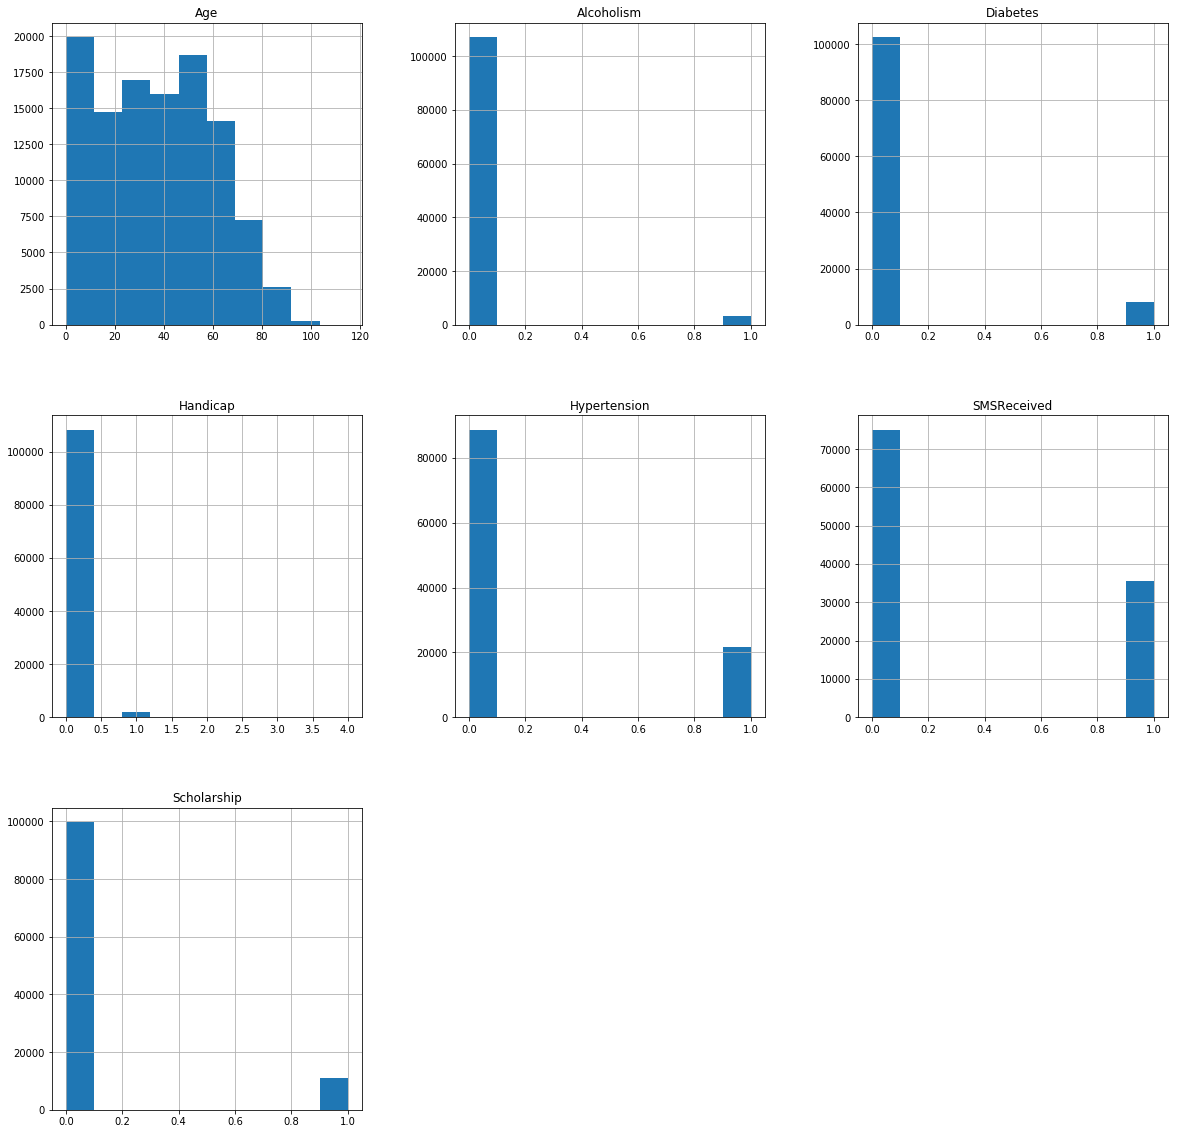

In [22]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# Our first step in data exploration will be to plot a histogram of our data to observe general properties and distributions
#   of our data.

df.hist(figsize=(20,20));

### Research Question 1: Does sending a SMS reminder impact whether patients will show up to an appointment?

In [23]:
sms_count = df['SMSReceived'].value_counts()
sms_count

0    75044
1    35482
Name: SMSReceived, dtype: int64

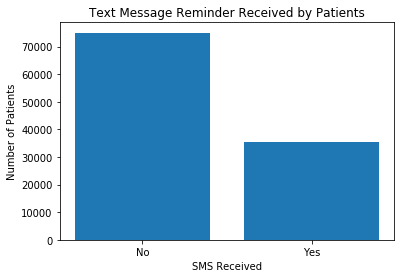

In [24]:
# Plot of SMS Received data
index = [0,1]
labels = ["No", "Yes"]
plt.bar(index, sms_count)
plt.title("Text Message Reminder Received by Patients")
plt.ylabel('Number of Patients')
plt.xlabel('SMS Received')
plt.xticks(index, labels);

As we can see from the above bar chart, a majority of patients in this data set did not receive a text message reminder. However, enough patients did receive text messages (over 35,000), enough to be able to analyze the patient data based on whether patients received text message reminders or not.

In [25]:
sms_recd_percent = df['SMSReceived'].sum() * 100 / df['SMSReceived'].count()
no_sms_recd_percent = 100 - sms_recd_percent
(sms_recd_percent, no_sms_recd_percent)

(32.102853627200837, 67.89714637279917)

In the above bar graph, we can see the number of patients who did not receive a text message and the number who received a text message. Roughly 68%of patients in this data set did not receive a text message before their appointment, and the other 32% received a text message.

In [26]:
# Proportion of no-shows by SMS received
SMSReceived_counts = df.groupby('SMSReceived')['NoShow'].value_counts()
SMSReceived_counts

SMSReceived  NoShow
0            No        62509
             Yes       12535
1            No        25698
             Yes        9784
Name: NoShow, dtype: int64

In [27]:
sms_recd_total = df['SMSReceived'].sum()
sms_recd_total

35482

In [28]:
sms_not_recd_total = df['SMSReceived'].count() - sms_recd_total
sms_not_recd_total

75044

In [29]:
sms_recd_no_show = SMSReceived_counts[0]['Yes']
sms_recd_no_show

12535

In [30]:
proportion_sms_recd = SMSReceived_counts[1] / sms_recd_total
proportion_sms_recd

NoShow
No     0.724255
Yes    0.275745
Name: NoShow, dtype: float64

In [31]:
proportion_sms_not_recd = SMSReceived_counts[0] / sms_not_recd_total
proportion_sms_not_recd

NoShow
No     0.832965
Yes    0.167035
Name: NoShow, dtype: float64

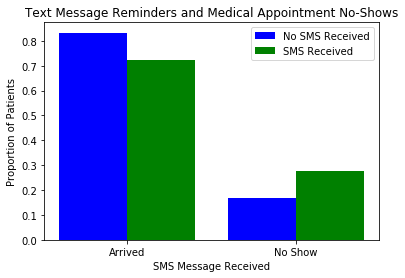

In [32]:
# Plot of SMS Received data
no_sms_data = [proportion_sms_not_recd['No'], proportion_sms_not_recd['Yes']]
sms_data = [proportion_sms_recd['No'], proportion_sms_recd['Yes']]

index = np.arange(len(sms_data))
width = .4
labels = ["Arrived", "No Show"]
plt.bar(index, no_sms_data, width, color='b', label = "No SMS Received")
plt.bar(index + width, sms_data, width, color='g', label = "SMS Received")
plt.title("Text Message Reminders and Medical Appointment No-Shows")
plt.ylabel('Proportion of Patients')
plt.xlabel('SMS Message Received')
locations = index + width / 2
plt.xticks(locations, labels);
plt.legend();

#### Research Question 1 Answer

Strangely enough, patients who received a reminder text message about their appointment actually had a higher 'no show' rate. It seems counterintuitive to think that a reminder text message would cause more patients to miss their appointment. At this point, it may be worth taking a detailed look into the statistics of each group to determine if there are inherent differences in the groups that may account for the different no show rates.

#### Research Question 1 Follow-Up

To examine any differences in the group of patients who received reminder text messages and those who did not, we can look at descriptive statistics and visualize any statistics, such as age, to examine differences in distribution.

In [33]:
df[text_recd].describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
count,35482.000000,35482.000000,35482.000000,35482.000000,35482.000000,35482.000000,35482.0
mean,37.513810,0.098782,0.193619,0.066400,0.023871,0.016572,1.0
std,22.330332,0.298374,0.395140,0.248983,0.152650,0.139882,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.0


In [34]:
df[no_text_recd].describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
count,75044.000000,75044.000000,75044.000000,75044.000000,75044.000000,75044.000000,75044.0
mean,36.888465,0.098022,0.198963,0.074450,0.033487,0.024932,0.0
std,23.467132,0.297347,0.399223,0.262503,0.179906,0.170767,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,0.0


Text(0.5,1,'Patients Who Received Text Message Reminders Age Distribution')

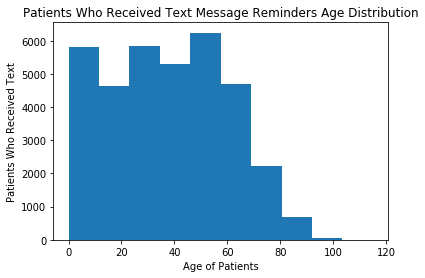

In [35]:
plt.hist(df.Age[text_recd]);
plt.xlabel("Age of Patients")
plt.ylabel("Patients Who Received Text");
plt.title("Patients Who Received Text Message Reminders Age Distribution")

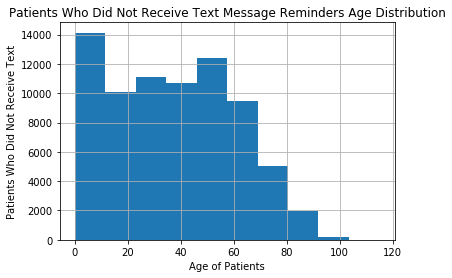

In [36]:
df.Age[no_text_recd].hist()
plt.xlabel("Age of Patients")
plt.ylabel("Patients Who Did Not Receive Text");
plt.title("Patients Who Did Not Receive Text Message Reminders Age Distribution");

#### Research Question 1 Follow Up Conclusion

As we can see from the above histograms, the age distribution for patients who received text message reminders is similar to the age distribution of patients who did not receive text message reminders. These groups also have similar descriptive statistics for other data collected in this data set. While there may be statistical differences to account for the different rate of appointment no shows between the groups, it is not readily apparent based on this analysis.

### Research Question 2: Does having a health condition impact no show rates?

The data obtained in this study contained several columns related to health conditions of the patient: hypertension, diabetes, alcoholism, and a handicap. Does the presence of at least one of these medical conditions impact the likelihood of a patient missing their appointment?

In [37]:
df['NoShow'].replace('No', 0, inplace=True)
df['NoShow'].replace('Yes', 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighborhood      110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicap          110526 non-null int64
SMSReceived       110526 non-null int64
NoShow            110526 non-null int64
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 11.0+ MB


In [38]:
df['HealthIssue'] = (df['Hypertension'] == 1) | (df['Diabetes'] == 1) | (df['Alcoholism'] == 1) | (df['Handicap'] == 1)
df['HealthIssue'].replace(True,1, inplace=True)
df['HealthIssue'].replace(False,0, inplace=True)
df['HealthIssue'] = df['HealthIssue'].astype('int', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighborhood      110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicap          110526 non-null int64
SMSReceived       110526 non-null int64
NoShow            110526 non-null int64
HealthIssue       110526 non-null int64
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.8+ MB


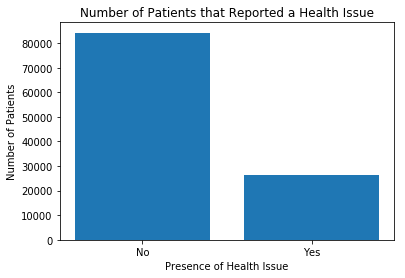

In [39]:
# Plot of health issue data totals
index = [0,1]
labels = ["No", "Yes"]
plt.bar(index, df['HealthIssue'].value_counts())
plt.title("Number of Patients that Reported a Health Issue")
plt.ylabel('Number of Patients')
plt.xlabel('Presence of Health Issue')
plt.xticks(index, labels);

Based on the above plot, people who report no health issue are significantly more represented than those who reported one of the health issues collected in the data. To examine differences between the health issue groups, plots will be based on proportion instead of absolute numbers.<br>
We will examine no-show data based on health issues to see if there are any differences. We can accomplish this by using descriptive statistics of the two groups and side-by-side bar charts showing no-show rates.


In [40]:
health_issue_totals = df['HealthIssue'].value_counts()
health_issue_totals

0    84223
1    26303
Name: HealthIssue, dtype: int64

In [41]:
health_issue_show_value_counts = df.groupby('HealthIssue')["NoShow"].value_counts()
health_issue_show_value_counts

HealthIssue  NoShow
0            0         66604
             1         17619
1            0         21603
             1          4700
Name: NoShow, dtype: int64

In [42]:
no_health_show_proportion = health_issue_show_value_counts[0] / health_issue_totals[0]
no_health_show_proportion

NoShow
0    0.790805
1    0.209195
Name: NoShow, dtype: float64

In [43]:
health_issue_show_proportion = health_issue_show_value_counts[1] / health_issue_totals[1]
health_issue_show_proportion

NoShow
0    0.821313
1    0.178687
Name: NoShow, dtype: float64

Based on the above calculations, roughly 79% of patients who did not report a health issue showed up to their medical appointment. This number increases to 82% for patients who did report at least one medical condition. We visualize these data with a bar graph, which is shown below.

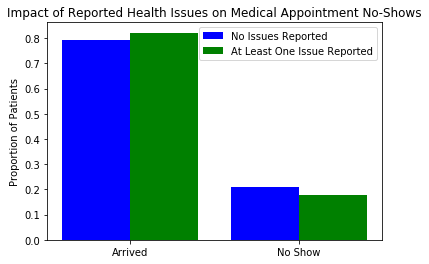

In [44]:
# Plot of Health Issues data
no_health_heights = [no_health_show_proportion[0], no_health_show_proportion[1]]
health_heights = [health_issue_show_proportion[0], health_issue_show_proportion[1]]

index = np.arange(len(no_health_show_proportion))
width = .4
labels = ["Arrived", "No Show"]
plt.bar(index, no_health_heights, width, color='b', label = "No Issues Reported")
plt.bar(index + width, health_heights, width, color='g', label = "At Least One Issue Reported")
plt.title("Impact of Reported Health Issues on Medical Appointment No-Shows")
plt.ylabel('Proportion of Patients')
locations = index + width / 2
plt.xticks(locations, labels);
plt.legend();

Based on this data set, it does not appear that, in general, reporting a health issue impacts whether patients go to their appointments. No shows were only slightly reduced for patients who reported at least one of the health issues recorded in this data set.<br><br>

#### Research Question 2 Follow Up

While it appears that health issues identified in this data set do not in general appear to impact rates of medical appointment no shows, it may be worthwhile to explore whether any particular health issues may lead to changes in medical appointment no show rates.<br><br>

In the next few cells, hypertension is examined in order to see if patients with this medical condition show a difference in rates of medical appointment no shows compared to patients without the condition. The next four cells outline Pandas functions to obtain rates of arrivals and no shows for patients with hypertension and those without. 

In [45]:
hypertension_totals = df['Hypertension'].value_counts()
hypertension_totals

0    88725
1    21801
Name: Hypertension, dtype: int64

In [46]:
hypertension_value_counts = df.groupby('Hypertension')["NoShow"].value_counts()
hypertension_value_counts

Hypertension  NoShow
0             0         70178
              1         18547
1             0         18029
              1          3772
Name: NoShow, dtype: int64

In [47]:
no_hypertension_prop = hypertension_value_counts[0] / hypertension_totals[0]
no_hypertension_prop

NoShow
0    0.790961
1    0.209039
Name: NoShow, dtype: float64

In [48]:
hypertension_prop = hypertension_value_counts[1] / hypertension_totals[1]
hypertension_prop

NoShow
0    0.82698
1    0.17302
Name: NoShow, dtype: float64

The cell below is a function that creates the proportions shown above and places the resulting values in a numpy array of shape (4,1). The function below will be used to create a dataframe containing rates of medical appointment no shows for each of the medical conditions collected in the data set, as well as rates for patients who do show up to their appointments.

In [49]:
def no_show_proportions(df, column1, column2):
    totals = df[column1].value_counts()
    value_counts = df.groupby(column1)[column2].value_counts()
    prop_0 = value_counts[0] / totals[0]
    prop_1 = value_counts[1] / totals[1]
    return np.array([[prop_0[0]], [prop_0[1]], [prop_1[0]], [prop_1[1]]])

The cell below obtains the different proportions to be used for analysis. Each column contains data for a single medical condition. The entries in a given column are in the following order:
- Element 0 will contain the portion of patients who do not have a given condition and arrive at their appointment
- Element 1 will contain the portion of patients who do not have a given condition but miss their appointment
- Element 2 will contain the portion of patients have a given condition and arrive at their appointment
- Element 3 will contain the portion of patients have a given condition but miss their appointment

After collecting the data, the data are placed into a Pandas dataframe with the appropriate number of rows and one column for each medical condition.

In [50]:
columns = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']

health_issues_proportions = []

for c in columns:
    proportions = no_show_proportions(df, c, "NoShow")
    health_issues_proportions.append(proportions)
    
health_issues_proportions = np.asarray(health_issues_proportions)
health_issues_proportions = np.reshape(health_issues_proportions, (-1, len(columns)))
health_issues_proportions = health_issues_proportions.transpose()
health_issues_proportions = pd.DataFrame(health_issues_proportions)
health_issues_proportions

,0,1,2,3
0,0.790961,0.796370,0.798052,0.797645
1,0.209039,0.203630,0.201948,0.202355
2,0.826980,0.819967,0.798512,0.820764
3,0.173020,0.180033,0.201488,0.179236


The function below creates a bar graph for each medical condition examined that allows for easy comparison of arrival and no show rates. These bar graphs can be used to quickly assess whether there is a possibility that patients with or without a medical condition are more likely to be a no show for their medical appointment.

In [51]:
def health_plot(column_name, column_data):

    index = np.arange(int(len(column_data) / 2))
    width = .4
    plt.bar(index, [column_data[0], column_data[1]],
        width, color='b', label = "No {}".format(column_name))
    plt.bar(index + width, [column_data[2], column_data[3]],
        width, color='g', label = "{}".format(column_name))
    plt.title("Impact of {} on Medical Appointment No Shows".format(column_name))
    plt.ylabel('Proportion of Patients')
    labels = ["Arrived", "No Show"]
    locations = index + width / 2
    plt.xticks(locations, labels);
    plt.legend();

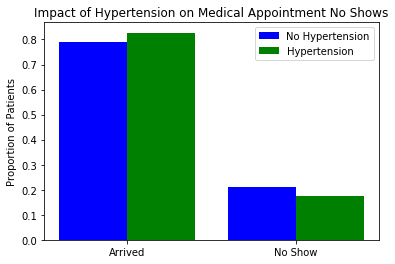

In [52]:
health_plot(columns[0], health_issues_proportions[0])

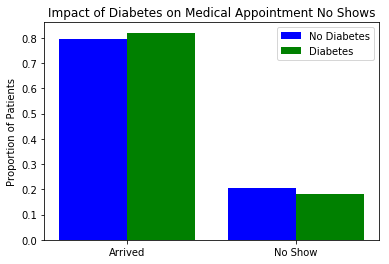

In [53]:
health_plot(columns[1], health_issues_proportions[1])

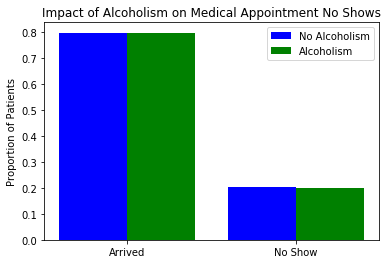

In [54]:
health_plot(columns[2], health_issues_proportions[2])

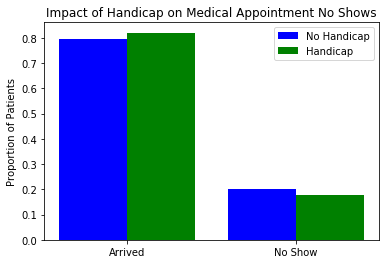

In [55]:
health_plot(columns[3], health_issues_proportions[3])

Based on a plot of rates of arrivals and no shows, it does not appear that the presence of any medical condition impacts rates of medical appointment no shows. It also appears that no specific medical condition impacts the rate of medical appointment no shows.

<a id='conclusions'></a>
## Conclusions

The first research question examined whether patients who received a text message reminder had different medical appointment no show rates. Is it possible that patients who receive text message reminders about their appointments are more likely to show up to their medical appointments? We found that, unexpectedly, that patients who received a text message reminder had a higher rate of medical appointment no shows. Patients who did not receive a text message had a no show rate of 16.7%. This rate increased to 27.6% for the group that received a text message.<br> 
We split the data into two groups, patients that received a text message and those that did not. Based on examination of descriptive statistics and a histogram of age distribution of the two groups, there were no clear differences in the data between those who received text messages and those who did not. Closer examination would be needed to determine if there are any differences between the two groups and if there is any causal relation between text messages and medical appointment no shows.<br><br>
The goal of the second research question was to determine whether patients with any medical condition in the data set had any differences in medical no show rates. Are patients with a medical condition more motivated to make it to their medical appointments? Alternatively, do patients with a medical condition struggle to make it to a medical appointment? We created a new column in our dataframe that was true if a patient had any medical condition. Using this data to compare no show rates, we found that patients with a medical condition did not have significantly different medical appointment no show rates. This observation also held true when each medical condition in the data set was examined individually. The analysis here suggests that those with medical conditions show up to their medical appointments at roughly the same rates as those who do not have a medical condition.